### 1. Data acquisition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

adult_df = pd.read_csv('adult.data',header=None)
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2. Data wrangling

In [2]:
test_df = pd.read_csv('adult.data',header=None)
test_df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

for i in range(len(test_df.columns)):
    test_df[test_df.columns[i]] = test_df[test_df.columns[i]].apply(lambda x: str(x).strip() if str(x).strip() != '?' else None)
    test_df['education_num'] = test_df['education_num'].astype(int)
test_df.head() 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### User Stories
1.	How are salaries varying with age?
2.	Salary variance by the occupation.
3.	How salaries are varying by gender.
4.	How salaries are varying by workclass.
5.	How salaries are varying for the individuals having native_country not as USA.
6.	How education and education_num linked with salaries. Is higher education guarantee more salaries?
7.	Furthermore, can workclass be used along with occupation to determine the salary.
8.	How relationship and marital_status can tell a lot about the individuals salary.

#### UserStory1: How are salaries varying with age?

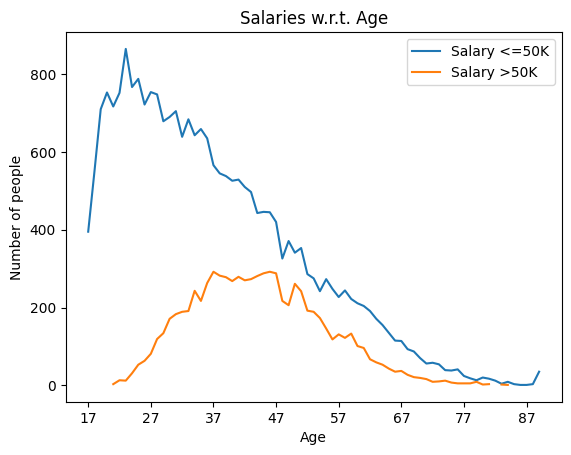

In [3]:
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby('age').count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby('age').count().income

res = pd.merge(df1, df2, how='left', on='age')
res.rename(columns={'income_x': 'Salary <=50K', 'income_y': 'Salary >50K'}, inplace=True)
res.plot(ylabel='Number of people', xlabel='Age',  title='Salaries w.r.t. Age')
plt.show()

#### UserStory2: Salary variance by the occupation.

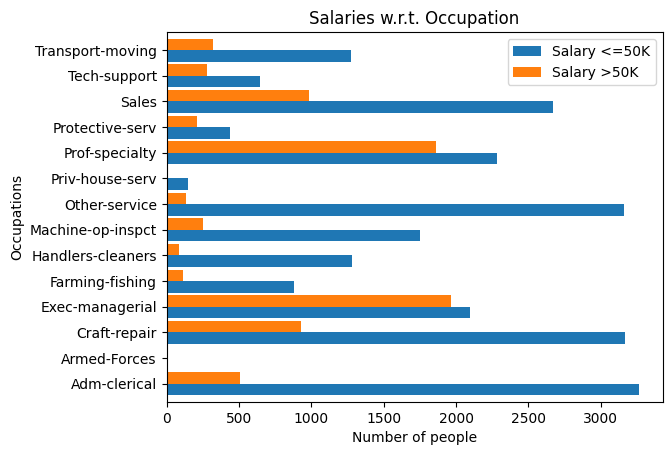

In [4]:
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['occupation']).count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['occupation']).count().income

res = pd.merge_ordered(df1, df2, how='left', on=['occupation'])
res.rename(columns={'income_x': 'Salary <=50K', 'income_y': 'Salary >50K'}, inplace=True)
res.plot.barh(x="occupation", y=['Salary <=50K', 'Salary >50K'], width=0.9, ylabel='Occupations', xlabel='Number of people', title='Salaries w.r.t. Occupation') 
plt.show()

#### UserStory3: How salaries are varying by gender.

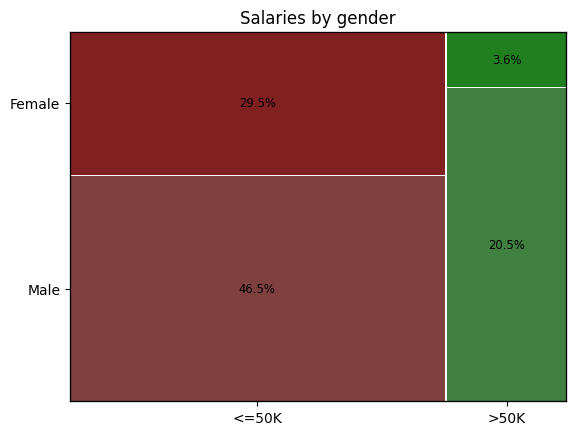

In [5]:
from statsmodels.graphics.mosaicplot import mosaic

def mosaic_label(x):
  return '{:.1%}'.format(df1.loc[(df1['income']== x[0]) & (df1['sex'] == x[1])].shape[0]/df1.shape[0])

df1 = test_df.copy()
mosaic(df1[['income', 'sex']], ['income', 'sex'], labelizer=mosaic_label)
plt.title('Salaries by gender')
plt.show()

#### UserStory4:	How salaries are varying by workclass.

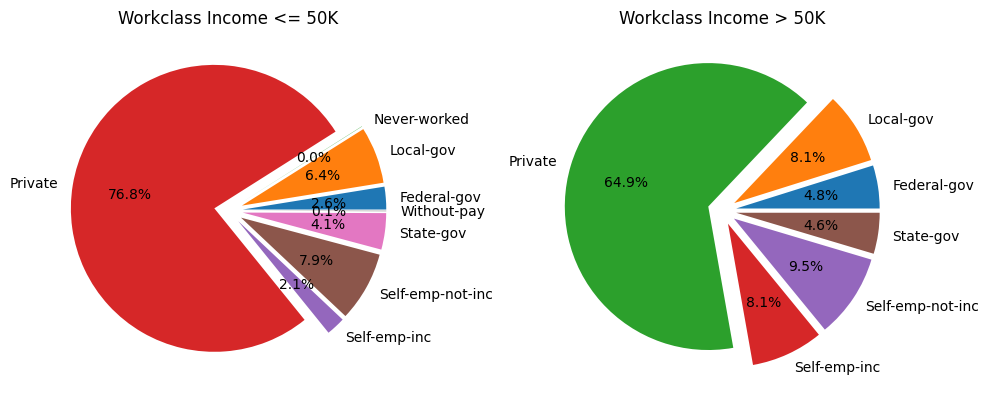

In [6]:
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['workclass']).count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['workclass']).count().income

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title('Workclass Income <= 50K')
df1.plot.pie(explode=[0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], ax=ax1, autopct='%1.1f%%', ylabel='')
ax2.set_title('Workclass Income > 50K')
df2.plot.pie(explode=[0.1,0.1, 0.1, 0.1, 0.1, 0.1], ax=ax2, autopct='%1.1f%%')
plt.ylabel('')
plt.tight_layout()
plt.show()



#### UserStory5: How salaries are varying for the individuals having native_country not as USA.

/var/folders/hz/39b35_l1613b0y34jngnhhd03wd5cc/T/ipykernel_73878/1903914296.py:23: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


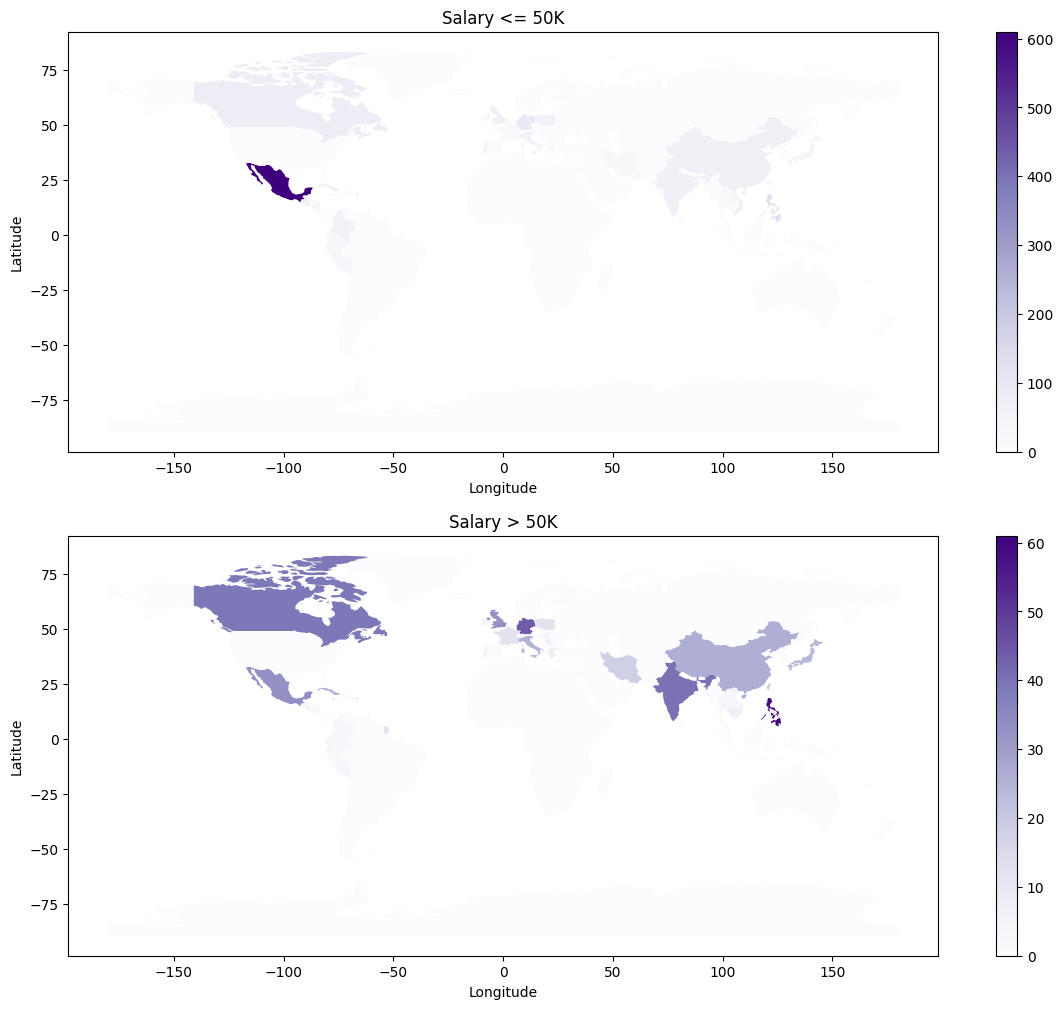

In [7]:
import geopandas as gpd

chloro_df = test_df.copy()
chloro_df.replace(to_replace='Yugoslavia', value='Serbia', inplace=True)
chloro_df.replace(to_replace='Holand-Netherlands', value='Netherlands', inplace=True)
chloro_df.replace(to_replace='Outlying-US(Guam-USVI-etc)', value='United States of America', inplace=True)
chloro_df.replace(to_replace='United-States', value='United States of America', inplace=True)
chloro_df.replace(to_replace='Hong', value='China', inplace=True)
chloro_df.replace(to_replace='Scotland', value='United Kingdom', inplace=True)
chloro_df.replace(to_replace='England', value='United Kingdom', inplace=True)
chloro_df.replace(to_replace='Puerto-Rico', value='Puerto Rico', inplace=True)
chloro_df.replace(to_replace='Dominican-Republic', value='Dominican Republic', inplace=True)
chloro_df.replace(to_replace='Columbia', value='Colombia', inplace=True)
chloro_df.replace(to_replace='El-Salvador', value='El Salvador', inplace=True)
chloro_df.replace(to_replace='Trinadad&Tobago', value='Trinidad and Tobago', inplace=True)
chloro_df = chloro_df[chloro_df['native_country'] != 'United States of America']
# chloro_df_wo_usa = chloro_df_wo_usa[chloro_df_wo_usa['native_country'] != 'Mexico']
df1 = chloro_df[chloro_df['income'] == '<=50K'].groupby(['native_country']).count().income.reset_index()
df2 = chloro_df[chloro_df['income'] != '<=50K'].groupby(['native_country']).count().income.reset_index()


# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_lower = world.merge(df1, left_on='name', right_on='native_country', how='left').fillna(0).sort_values(['income'], ascending=False)
merged_higher = world.merge(df2, left_on='name', right_on='native_country', how='left').fillna(0).sort_values(['income'], ascending=False)

# Create the choropleth plot
fig, ax = plt.subplots(2, 1, figsize=(15, 12))
merged_lower.plot(column='income', ax=ax[0], legend=True, cmap='Purples')

# Set the title and labels
ax[0].set_title('Salary <= 50K')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

# Show the plot
# plt.show()

# Create the choropleth plot
# fig, ax = plt.subplots(figsize=(15, 6))
merged_higher.plot(column='income', ax=ax[1], legend=True, cmap='Purples')

# Set the title and labels
ax[1].set_title('Salary > 50K')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

#### UserStory6: How education and education_num linked with salaries. Is higher education guarantee more salaries?

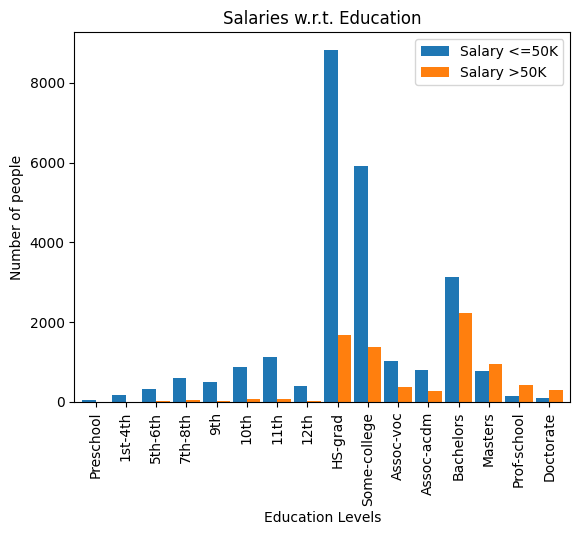

In [8]:
temp = test_df[['education', 'education_num']].groupby(['education', 'education_num']).nunique()
temp.sort_values(['education_num'])

df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['education', 'education_num']).count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['education', 'education_num']).count().income

res = pd.merge_ordered(df1, df2, how='left', on=['education', 'education_num'])
res.rename(columns={'income_x': 'Salary <=50K', 'income_y': 'Salary >50K'}, inplace=True)
res.sort_values('education_num', inplace=True)
res.plot.bar(x="education", y=['Salary <=50K', 'Salary >50K'], width=0.9, xlabel='Education Levels', ylabel='Number of people', title='Salaries w.r.t. Education') 
plt.show()

### UserStory7: Furthermore, can workclass be used along with occupation to determine the salary.

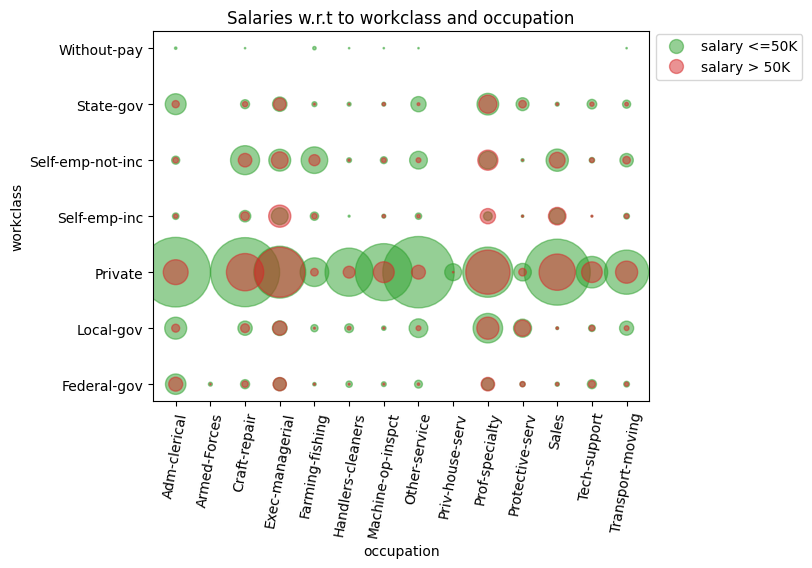

In [9]:
from matplotlib.lines import Line2D

df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['occupation', 'workclass']).count().income.reset_index()
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['occupation', 'workclass']).count().income.reset_index()

fig, ax = plt.subplots()
df1.plot.scatter(x='occupation', y = 'workclass', ax=ax, c='C2', s='income', alpha=0.5, rot=80, label='x')
df2.plot.scatter(x='occupation', y = 'workclass', ax=ax, c='C3', s='income', alpha=0.5, rot=80, label='y')
h1 = Line2D([0], [0], marker='o', markersize=5, color='C2', linestyle='None', alpha=0.5)
h2 = Line2D([0], [0], marker='o', markersize=5, color='C3', linestyle='None', alpha=0.5)

ax.legend([h1, h2], ['salary <=50K', 'salary > 50K'], loc="lower left", markerscale=2, bbox_to_anchor=(1, .85))
ax.set_title('Salaries w.r.t to workclass and occupation')
plt.show()

#### UserStory8: How relationship and marital_status can tell a lot about the individuals salary.

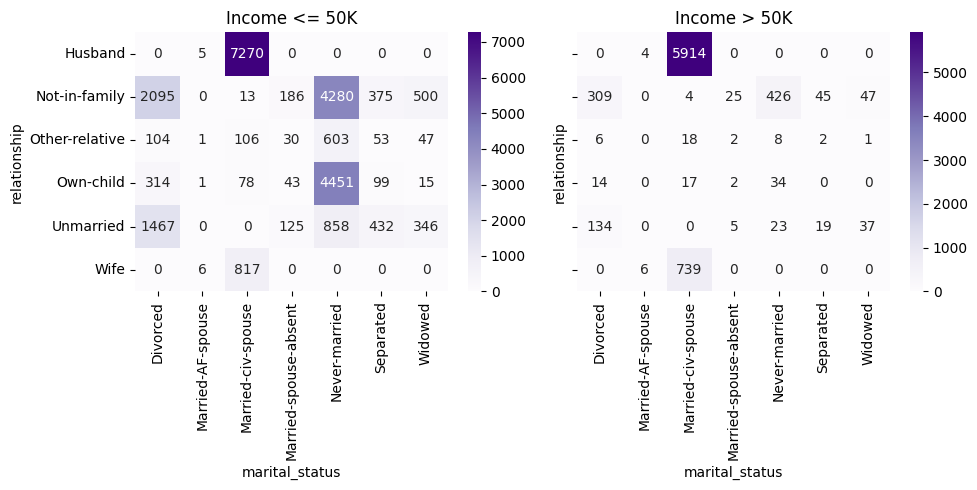

In [10]:
import seaborn as sn

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['relationship','marital_status']).count().income.reset_index()
data = df1.pivot_table(index='relationship', columns='marital_status', values='income')
sn.heatmap(data.fillna(0), annot=True, fmt="g", cmap='Purples', ax=ax1)
ax1.set_title('Income <= 50K')

df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['relationship','marital_status']).count().income.reset_index()
data2 = df2.pivot_table(index='relationship', columns='marital_status', values='income')
sn.heatmap(data2.fillna(0), annot=True, fmt="g", cmap='Purples', ax=ax2)
ax2.set_title('Income > 50K')
fig.tight_layout()
plt.show()

### Not considered anymore

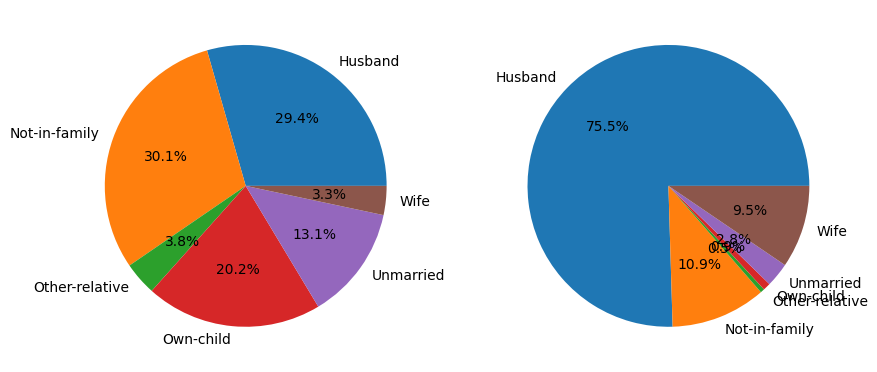

In [11]:
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['relationship']).count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['relationship']).count().income

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
df1.plot.pie(autopct='%1.1f%%', ylabel='', ax=ax1)
df2.plot.pie(autopct='%1.1f%%', ylabel='', ax=ax2)
plt.show()

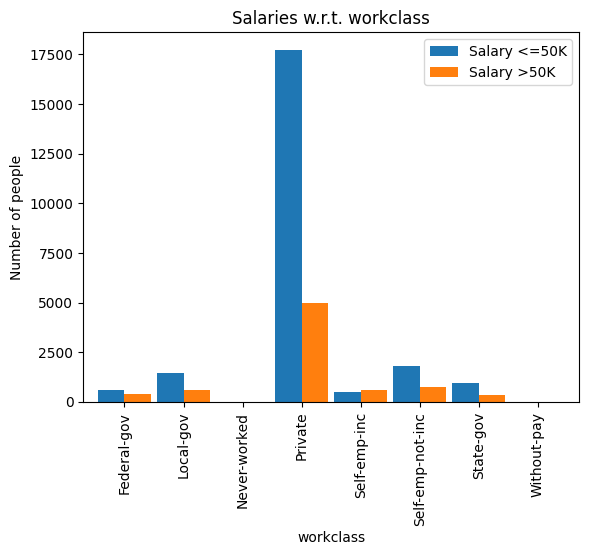

In [12]:
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['workclass']).count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['workclass']).count().income

res = pd.merge_ordered(df1, df2, how='left', on=['workclass'])
res.rename(columns={'income_x': 'Salary <=50K', 'income_y': 'Salary >50K'}, inplace=True)
res.plot(x="workclass", y=['Salary <=50K', 'Salary >50K'], kind="bar", width=0.9, xlabel='workclass', ylabel='Number of people', title='Salaries w.r.t. workclass') 
plt.show()

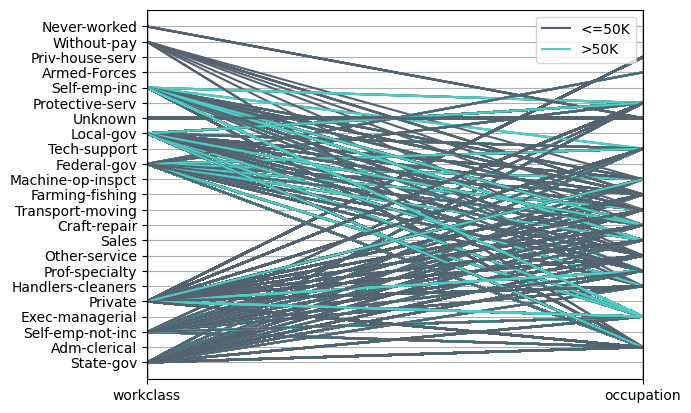

In [13]:
from pandas.plotting import parallel_coordinates

df1 = test_df.copy()[['workclass', 'occupation', 'income']]
parallel_coordinates(df1.fillna('Unknown'), class_column='income', color=('#556270', '#4ECDC4'))
plt.show()

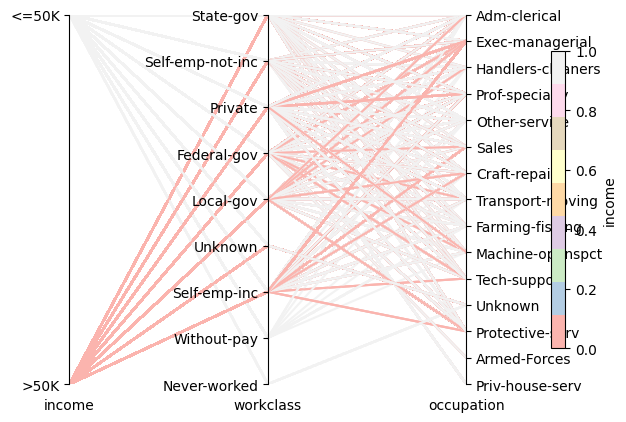

In [14]:
import paxplot

dfx = test_df.copy()[['income', 'workclass', 'occupation']].fillna('Unknown')
cols = dfx.columns
paxfig = paxplot.pax_parallel(n_axes=len(cols))
paxfig.plot(dfx.to_numpy())
# Add labels
paxfig.set_labels(cols)

# Add colorbar
color_col = 0
paxfig.add_colorbar(
    ax_idx=color_col,
    cmap='Pastel1',
    colorbar_kwargs={'label': cols[color_col]}
)

plt.show()